### Import libraries and dataframes

In [3]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [5]:
# import merged dataframe
path = r'C:\Users\98912\MAY 2022 Instacart Analysis'
ords_prods_merged = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared Data', 'orders_products_merged_ver3.pkl'))
ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prder_price,spending_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New_customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New_customer,6.367797,Low spender,20.0,Regular customer


<AxesSubplot:>

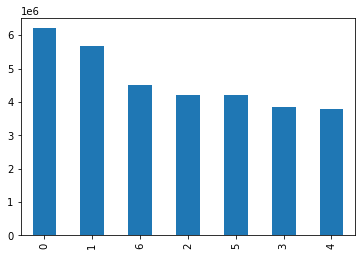

In [8]:
ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

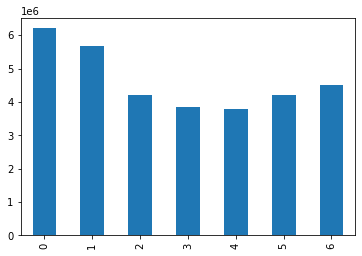

In [9]:
ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

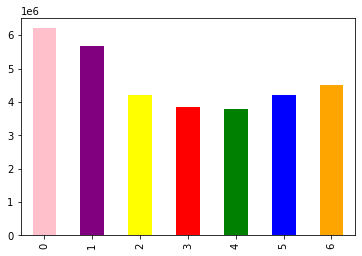

In [12]:
bar = ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar(color=['pink', 'purple', 'yellow', 'red', 'green', 'blue', 'orange'])

In [15]:
bar.figure.savefig(os.path.join(path, '04-Analysis', 'bar_chart.jpg'))

#### Histograms plots

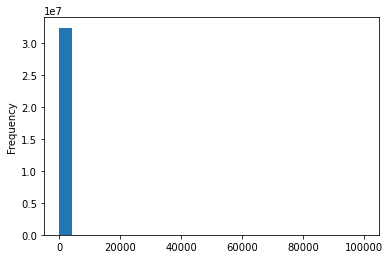

In [18]:
hist = ords_prods_merged['prices'].plot.hist(bins=25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

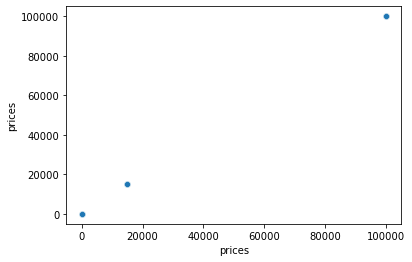

In [20]:
sns.scatterplot(x='prices', y='prices', data=ords_prods_merged)

In [26]:
ords_prods_merged.loc[ords_prods_merged['prices']>100, ['prices']]

,prices
10030345,14900.0
10030346,14900.0
10030347,14900.0
10030348,14900.0
10030349,14900.0
...,...
29166209,99999.0
29166210,99999.0
29166211,99999.0
29166212,99999.0


In [27]:
# turn the unxpected values into missing value
ords_prods_merged.loc[ords_prods_merged['prices']>100, ['prices']] = np.nan

In [28]:
ords_prods_merged['prices'].max()

25.0

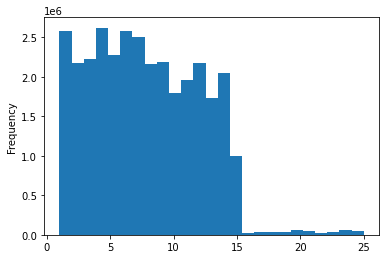

In [29]:
hist = ords_prods_merged['prices'].plot.hist(bins=25)

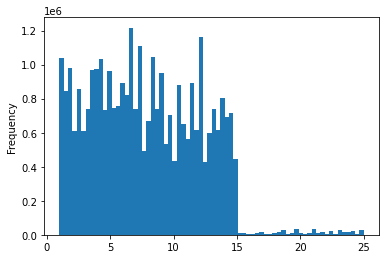

In [30]:
hist = ords_prods_merged['prices'].plot.hist(bins=70)

In [31]:
hist.figure.savefig(os.path.join(path, '04-Analysis', 'histogram.jpg'))

###  Create subsample

In [35]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [38]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [39]:
big = ords_prods_merged[dev]

In [40]:
small = ords_prods_merged[~dev]

In [41]:
len(small)+len(big)

32404859

In [42]:
df_2 = small[['order_day_of_week', 'prices']]

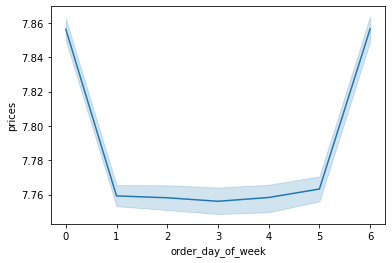

In [43]:
line = sns.lineplot(data = df_2, x='order_day_of_week', y='prices')

In [44]:
df_4 = ords_prods_merged[['order_day_of_week', 'prices']]

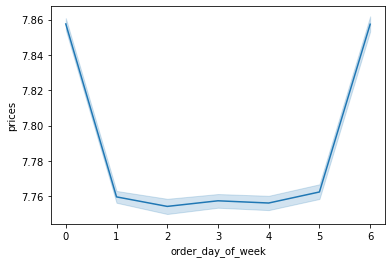

In [45]:
line_2 = sns.lineplot(data = df_4, x='order_day_of_week', y='prices')

In [48]:
ords_prods_merged['prices'].value_counts()

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 240, dtype: int64

In [49]:
df_4['prices'].value_counts()

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 240, dtype: int64

In [51]:
ords_prods_merged.groupby('order_day_of_week').agg({'prices': ['mean', 'max', 'min']})

prices           
                       mean   max  min
order_day_of_week                     
0                  7.857590  25.0  1.0
1                  7.759697  25.0  1.0
2                  7.754309  25.0  1.0
3                  7.757485  25.0  1.0
4                  7.756223  25.0  1.0
5                  7.762477  25.0  1.0
6                  7.857431  25.0  1.0